# Evaluation of results

In [5]:
import numpy as np
from scipy.optimize import minimize
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline

## Results Using pix2pix

In [2]:
imgname = '890.jpg'
infold = '../outputs/test/images/input/'
otfold = '../outputs/test/images/output/'
trfold = '../outputs/test/images/target/'

In [3]:
temp_in = img.imread(''.join((infold, imgname)))
temp_out = img.imread(''.join((otfold, imgname)))
temp_tar = img.imread(''.join((trfold, imgname)))

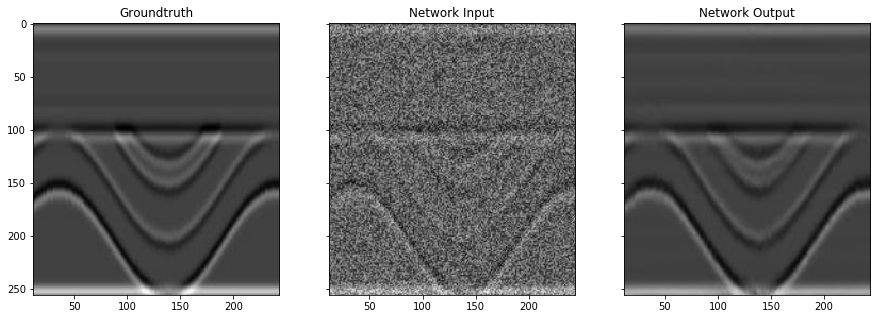

In [4]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,5))

ax1.imshow(temp_tar, cmap='Greys')
ax1.set_title('Groundtruth')
ax2.imshow(temp_in, cmap='Greys')
ax2.set_title('Network Input')
ax3.imshow(temp_out, cmap='Greys')
ax3.set_title('Network Output')

plt.show()

## Comparison with other denoising strategies

In [7]:
%%time

tv = denoise_tv_chambolle(temp_in, weight=0.1, multichannel=True)
bilat = denoise_bilateral(temp_in, sigma_color=0.05, sigma_spatial=15,
                multichannel=True)
wavelet = denoise_wavelet(temp_in, multichannel=True)

CPU times: user 10.2 s, sys: 8 ms, total: 10.2 s
Wall time: 10.2 s


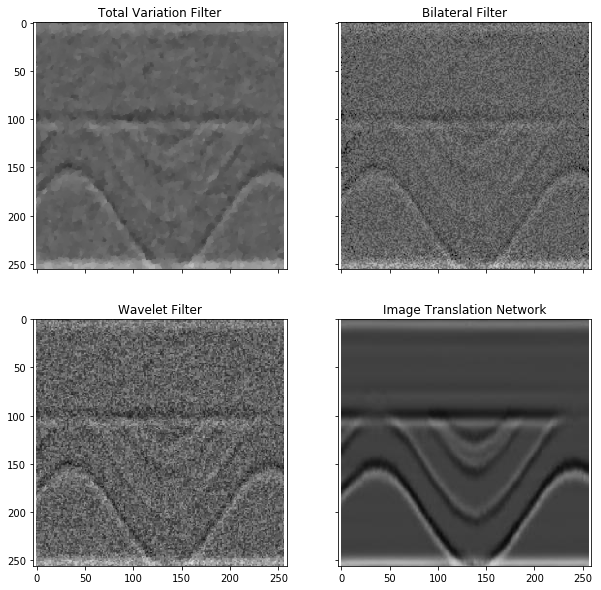

In [26]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10,10))

ax1.imshow(tv, cmap='Greys')
ax1.set_title('Total Variation Filter')
ax2.imshow(bilat, cmap='Greys')
ax2.set_title('Bilateral Filter')
ax3.imshow(wavelet, cmap='Greys')
ax3.set_title('Wavelet Filter')
ax4.imshow(temp_out, cmap='Greys')
ax4.set_title('Image Translation Network')

plt.show()